In [1]:
# To supress Warning messages
import warnings 
warnings.filterwarnings('ignore')

# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [2]:
#Import numpy, Pandas and matplotlib modules

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load the input csv file into a  DataFrame

iris = pd.read_csv('iris.csv')

In [4]:
#Check if the DataFrame is loaded correctly using head()

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Check if the DataFrame is loaded correctly using sample()
#sample() randomly displays input no of rows from the DataFrame

iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,10,4.9,3.1,1.5,0.1,Iris-setosa
19,20,5.1,3.8,1.5,0.3,Iris-setosa
114,115,5.8,2.8,5.1,2.4,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
66,67,5.6,3.0,4.5,1.5,Iris-versicolor


## Data Pre-processing

### Question 2 - Check if there are any missing values



In [6]:
#Using isna function to check nan values

iris.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [7]:
#Using fillna to fill null values with 0

iris.fillna(value=0, inplace=True)

In [8]:
#Using isna function to re-check if nan values are present

iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [9]:
#Check Datatypes

iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
#Import preprocessing module from sklearn

from sklearn import preprocessing

In [11]:
#Using LabelEncoder to change numerical values to categorical values
#Encode labels with value between 0 and n_classes-1
#LabelEncoder can be used to normalize labels.
#It can also be used to transform non-numerical labels to numerical labels.
#The non-numerical labels should be hashable and comparable.

le = preprocessing.LabelEncoder()

In [12]:
#Fit label encoder using fit() method
#Using fit() method to change all the classes in 'Species' variable which are categories to numerical values

le.fit(iris['Species'])

LabelEncoder()

In [13]:
#Check the categorical values assigned to the classes in 'Species' column.
#classes_ attribute holds the label for each class.It gives the array of shape

le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
#Assign the changed categorical values 0,1, 2 to the Dataframe.
#The original column in the DataFrame is tranformed or modified to a column with the categorical values 0,1,2
#Transform labels to normalized encoding.

iris['Species'] = le.transform(iris['Species'])

In [15]:
#Check the categorical values assigned to the classes in 'Species' column.

le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
#Check for unique values in species column

iris['Species'].unique()

array([0, 1, 2], dtype=int64)

In [17]:
#Check Datatypes

iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [18]:
#Check the DataFrame values using head
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [19]:
#Check the DataFrame values using sample()
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
30,31,4.8,3.1,1.6,0.2,0
69,70,5.6,2.5,3.9,1.1,1
24,25,4.8,3.4,1.9,0.2,0
25,26,5.0,3.0,1.6,0.2,0
42,43,4.4,3.2,1.3,0.2,0


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [20]:
#Find correlation of each independent variable with target variable
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.539500,-0.427175,0.793490,0.864447,0.942753
SepalLengthCm,0.539500,1.000000,0.145802,0.816560,0.668652,0.622970
SepalWidthCm,-0.427175,0.145802,1.000000,-0.167316,-0.246073,-0.410273
PetalLengthCm,0.793490,0.816560,-0.167316,1.000000,0.936151,0.879652
PetalWidthCm,0.864447,0.668652,-0.246073,0.936151,1.000000,0.931308
Species,0.942753,0.622970,-0.410273,0.879652,0.931308,1.000000


In [21]:
#Check the corr values in Species column
iris.corr()['Species']

Id               0.942753
SepalLengthCm    0.622970
SepalWidthCm    -0.410273
PetalLengthCm    0.879652
PetalWidthCm     0.931308
Species          1.000000
Name: Species, dtype: float64

In [22]:
#There are no corr() values in the given range ie, between -0.1 and 0.1
iris.corr().loc[:, (  iris.corr()['Species'] >= -0.1) & (iris.corr()['Species'] <= 0.1 ) ]

""
Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [23]:
#Finding Variance
iris.iloc[:,0:4].var()

Id               1938.000000
SepalLengthCm       0.901297
SepalWidthCm        0.307424
PetalLengthCm       3.256603
dtype: float64

In [24]:
#There are no independent variable having variance < 0.1
iris.iloc[:,0:4].var() < 0.1

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
dtype: bool

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

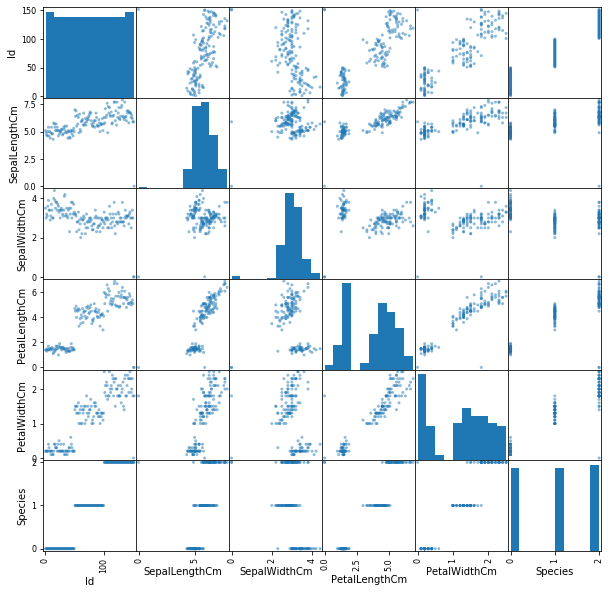

In [25]:
#Plotting Scatter Matrix for all variables
pd.plotting.scatter_matrix(iris, figsize=(10,10))
plt.show()

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [26]:
#Import test_train_split() function from the module sklearn.module_selection
#test_train_split function splits the input dataset(np array, DatFrame or lists) into random train and test subsets.
#Import zscore() function from the module scipy.stats
#zscore() used to calculate the z score of each value in the sample, relative to the sample mean and standard deviation.

from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [27]:
#Check Datatypes

iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [28]:
#Convert dtype of 'Species' column to category

iris['Species'] = iris['Species'].astype('category')

In [29]:
#Check Datatypes

iris.dtypes

Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [30]:
#groupby the target column 'Species' on the feature columns and find count of each feature for each class of Species

iris.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
0,50,50,50,50,50
1,50,50,50,50,50
2,52,52,52,52,52


In [31]:
#Drop the ID column in the DataFrame, as it is not a feature used in model building.

iris = iris.drop(labels = 'Id', axis = 1)

In [32]:
#Check the shape of the DataFrame.

iris.shape

(152, 5)

In [33]:
#Create a DataFrame 'iris_features' with only the feature columns fron 'iris' DataFrame.

iris_features = iris.drop(labels='Species', axis=1)

In [34]:
#Check DataFrame rows and columns using head().

iris_features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
#Create a DataFrame 'iris_labels' with only the target column fron 'iris' DataFrame.

iris_labels = iris['Species']

In [36]:
#Check DataFrame rows and columns using head().

iris_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: category
Categories (3, int64): [0, 1, 2]

In [37]:
#Apply the zscore function from scipy.stats on iris_Features DataFrame and get a new DataFrame,
#containing the zscores of all the values of all feature columns.
#This step is done to normaliize the distribution of given dataset.

iris_features_Z = iris_features.apply(zscore)

In [38]:
#Check the zcores DataFrame rows and columns using head().

iris_features_Z.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.745334,0.879763,-1.283850,-1.303084
1,-0.956697,-0.025000,-1.283850,-1.303084
2,-1.168060,0.336905,-1.339447,-1.303084
3,-1.273742,0.155952,-1.228253,-1.303084
4,-0.851015,1.060715,-1.283850,-1.303084


In [39]:
#Create an np array X from 'iris_features_Z' Dataframe, containing zscores of all feature column values.
#This array is used as the feature dataset, which is used to buid tthe training and test sets for features.

#X = np.array(iris_features_Z)

#We are not using the zscores DataFrame, as the size of input dataset is very small
# and the model learns very easily from the dataset and so accuracy will be 100%
#Using'iris_features' Dataframe to create an np array X 

X = np.array(iris_features)

In [50]:
#Check the shape of the np array X

X.shape

(152, 4)

In [52]:
#Check the datatype of the np array X

X.dtype

dtype('float64')

In [41]:
#Create an np array y from 'iris_labels' Dataframe, containing label column values.

y = np.array(iris_labels)

In [53]:
#Check the shape of the np array y

y.shape

(152,)

In [54]:
#Check the datatype of the np array y

y.dtype

dtype('int64')

In [43]:
#Using test_train_split function to split the input X and y np datasets,
#into random X_train, y_train and X_test, y_test subsets.
#Giving a test_size as 0.20, to split the dataset into 80% for Training and 20% for Testing.
#random_state=1 is used to randomize the split only one time.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [44]:
#As the dataset is very small in size,
#the model is learning quickly and so the Accuracy score is 1.0 or 100% for most of the K values

In [45]:
#Import sklearn.neighbors module from sklearn 
#This module implements the k-nearest neighbors algorithm.
#Import KNeighboursClassifier class from sklearn.neighbours which implemen the kts-nearest neighbors voting 

from sklearn.neighbors import KNeighborsClassifier

#Import sklearn.metrics module from sklearn
#This module includes score functions, performance metrics, pairwise metrics and distance computations.

from sklearn import metrics

#Import seaborn module for visualizations

import seaborn as sns

In [46]:
#for each k n_neighbour value of 3,5,9, create an instance of KNeighboursClassifier class.
#the input params used are k=3,4,5, weights used for prediction is distance, p=2 default indicating euclidean distance
#the algorithm used for prediction is auto indicating most appropriate algorithm based on values passed to fit method.
#fit method used to Fit the model using X as training data and y as target values
#predict method used to Predict the class labels for the provided data
#score method used to find mean accuracy on the given training data and test data
#sklearn.metrics.accuracy_score function is used to find Accuracy classification score of test dataset.
#the param norm is true by default, so function returns the fraction of correctly classified samples.


for i in (3,5,9):
    print('\nk : ',i)
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance')
    NNH.fit(X_train, y_train)
    y_predict = NNH.predict(X_test)
    print('Training set Score : ',NNH.score(X_train, y_train))
    print('Test set Score : ',NNH.score(X_test, y_test))
    print('Accuracy Score of Test dataset for k = ', i , 'is', metrics.accuracy_score(y_test, y_predict))



k :  3
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  3 is 1.0

k :  5
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  5 is 1.0

k :  9
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  9 is 1.0


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Misclassification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [47]:
#As the dataset is very small in size, the model is learning quickly
#so the Accuracy score is 1.0 for most of the K values and the MSE value is 0 for most of the K values

In [48]:
#Predict the model using KNeighboursClassifier algorithms for k vaues 1,3,5,7,...19.
#Using fit, predit, score methods.
#Using accuracy_score function to find accuracy score of classification.
#1-acuracy_score gives the MisCalculation error MSE

for i in range(1,20,2):
    print('\nk : ',i)
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance')
    NNH.fit(X_train, y_train)
    y_predict = NNH.predict(X_test)
    print('Training set Score : ',NNH.score(X_train, y_train))
    print('Test set Score : ',NNH.score(X_test, y_test))
    print('Accuracy Score of Test dataset for k = ', i , 'is', metrics.accuracy_score(y_test, y_predict))
    print('MisCalculation Error MSE = ', 1-metrics.accuracy_score(y_test, y_predict))


k :  1
Training set Score :  1.0
Test set Score :  0.967741935483871
Accuracy Score of Test dataset for k =  1 is 0.967741935483871
MisCalculation Error MSE =  0.032258064516129004

k :  3
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  3 is 1.0
MisCalculation Error MSE =  0.0

k :  5
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  5 is 1.0
MisCalculation Error MSE =  0.0

k :  7
Training set Score :  1.0
Test set Score :  0.967741935483871
Accuracy Score of Test dataset for k =  7 is 0.967741935483871
MisCalculation Error MSE =  0.032258064516129004

k :  9
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  9 is 1.0
MisCalculation Error MSE =  0.0

k :  11
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  11 is 1.0
MisCalculation Error MSE =  0.0

k :  13
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test datase

## Plot accuracy

### Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

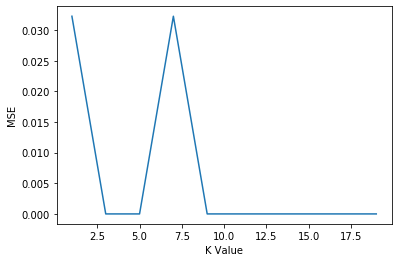

In [49]:
#Plot the MSE score for each K value using plotfunction in matplotlib.pyplot module.

K_value = list()
MSE = list()
for i in range(1,20, 2):
    #print('\nk : ',i)
    K_value.append(i)
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance')
    NNH.fit(X_train, y_train)
    y_predict = NNH.predict(X_test)
    mse_val = 1 - metrics.accuracy_score(y_test, y_predict)
    MSE.append(mse_val)
plt.plot(K_value, MSE)
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.show()